In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 10)

import database

database.DB_HOST = 'localhost'
db = database.connect()

In [53]:
with db, db.cursor() as cursor:
    cursor.execute('select * from user_follows')
    follows = cursor.fetchall()
    cursor.execute('select id as user_id, follower_id, added_time from twitter_followers, users'
                   ' where twitter_followers.leader_id = users.twitter_id')
    followers = cursor.fetchall()

In [54]:
# We only began storing user's followers at this time:
min_time = min(row.added_time for row in followers if row.user_id == 2)
follows = [row for row in follows if row.time >= min_time]

In [55]:
follow_times = {(row.user_id, row.leader_id): row.time for row in follows}
follower_times = {(row.user_id, row.follower_id): row.added_time for row in followers}
follow_delays = {k: follower_times[k] - follow_times[k] for k in follower_times if k in follow_times}

In [56]:
import collections
print('follows', collections.Counter(user_id for user_id, _ in follow_times))
print('followers', collections.Counter(user_id for user_id, _ in follower_times))
print('both', collections.Counter(user_id for user_id, _ in follow_delays))

follows Counter({4: 3000, 2: 2837, 5: 2487, 3: 2008, 1: 1924})
followers Counter({2: 11513, 4: 1076, 5: 680, 3: 247, 1: 177})
both Counter({2: 278, 4: 200, 5: 86, 3: 53, 1: 30})


(array([ 158.,  150.,   67.,   34.,   60.,   23.,   14.,    6.,   12.,
           3.,   15.,    2.,    7.,    7.,    2.,    4.,    5.,    1.,
           0.,    1.,    1.,    1.,    0.,    0.,    0.,    1.,    1.,
           0.,    1.,    1.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([  0.07926687,   0.29553162,   0.51179636,   0.72806111,
          0.94432586,   1.1605906 ,   1.37685535,   1.59312009,
          1.80938484,   2.02564958,   2.24191433,   2.45817907,
          2.67444382,   2.89070857,   3.10697331,   3.32323806,
          3.5395028 ,   3.75576755,   3.97203229,   4.18829704,
          4.40456179,   4.62082653,   4.83709128,   5.05335602,
          5.26962077,   5.48588551,   5.70215026,   5.91841501,
          6.13467975,   6.3509445 ,   6.56720924,   6.78347399,
          6.99973873,   7.21600348,   7.43226823,   7.64853297,
          7.86479772,   

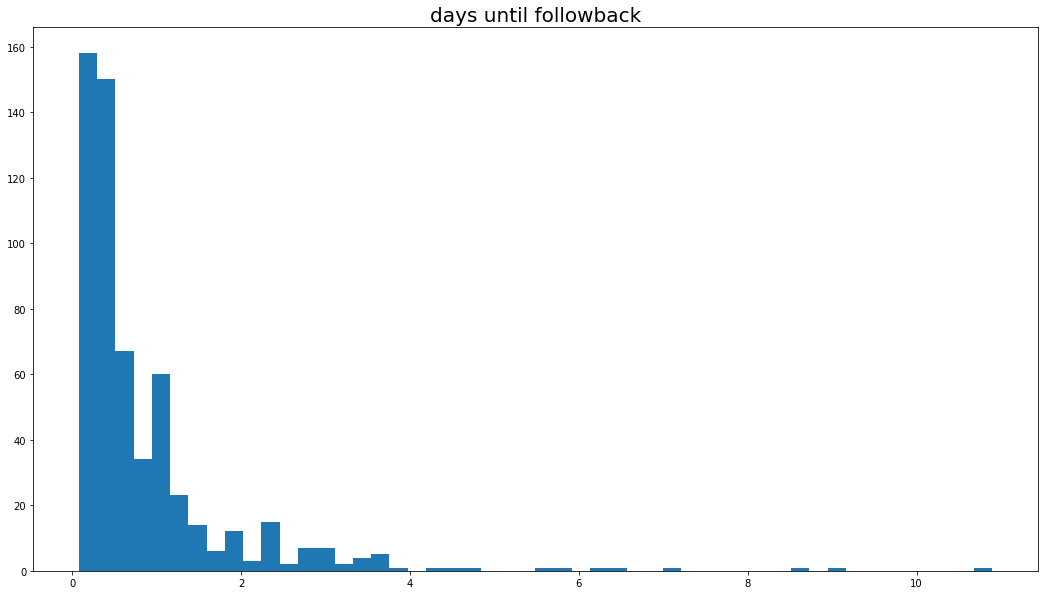

In [74]:
plt.title('days until followback', fontsize=20)
plt.hist([d / datetime.timedelta(days=1) for d in follow_delays.values() if d.total_seconds() > 0], 50)

(array([ 45.,  60.,  13.,  38.,  11.,   9.,  10.,  32.,  32.,   9.,   4.,
         22.,  18.,   6.,   2.,  24.,  27.,  36.,  64.,  44.,  73.,  15.,
         41.,  12.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

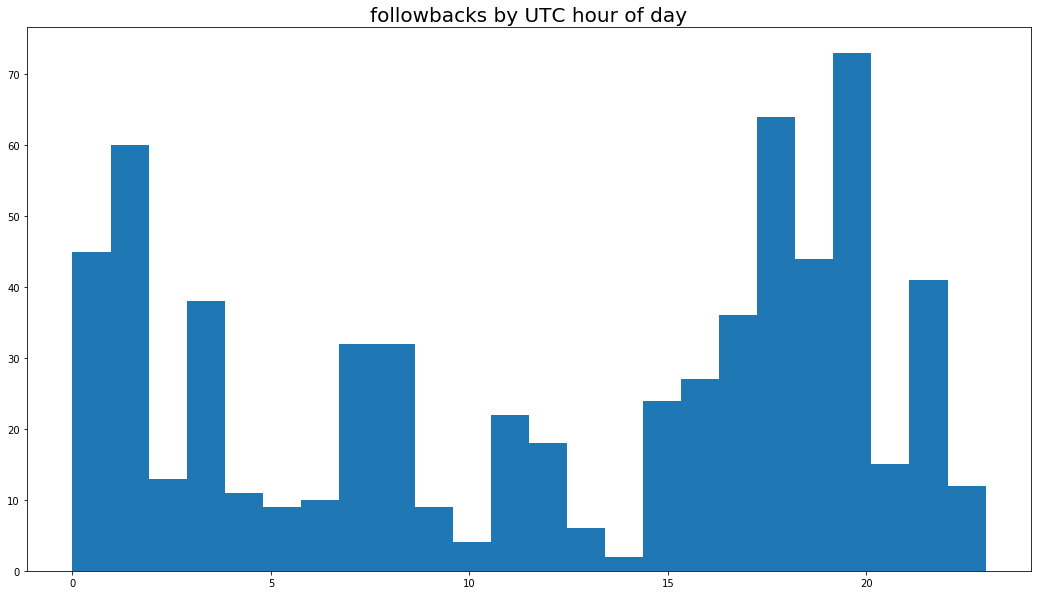

In [69]:
plt.title('followbacks by UTC hour of day', fontsize=20)
plt.hist([t.hour for k, t in follow_times.items() if k in follower_times], 24)

(array([  99.,  107.,   64.,  100.,   96.,   98.,   83.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

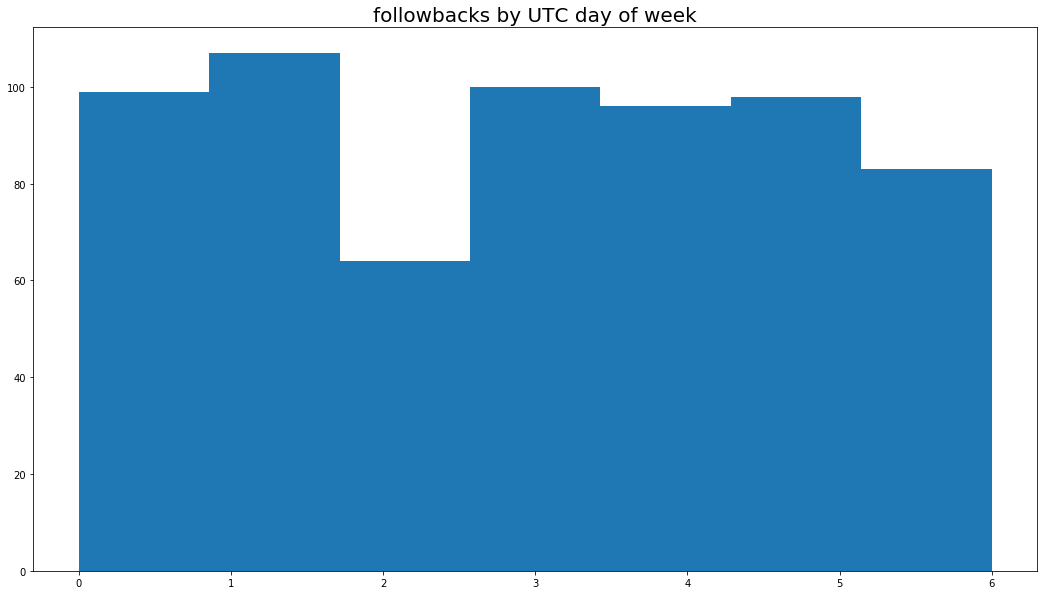

In [70]:
plt.title('followbacks by UTC day of week', fontsize=20)
plt.hist([t.weekday() for k, t in follow_times.items() if k in follower_times], 7)

(array([ 19.,   0.,   8.,  16.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   3.,   1.,  43.,   1.,
          0.,   0.,   9.,  32.,   0.,   0.,   2.,   0.,   1.,  11.,  12.,
          0.,   2.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   9.,
          0.,   2.,  13.,  12.,   5.,   8.,   5.,  16.,   0.,   1.,   0.,
          0.,  16.,   3.,   0.,   8.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,   0.,
          0.,   8.,  13.,   0.,   0.,   2.,   0.,  14.,   0.,   0.,   0.,
         19.,   3.,   6.,  29.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,
          0.,   0.,   0.,   0.,   0.,   8.,   4.,   0.,   0.,   0.,   9.,
          0.,   0.,   3.,   1.,   1.,  30.,   5.,  26.,   6.,   0.,   0.,
          0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   6.,   0.,
          0.,   9.,   6.,   0.,   0.,  11.,  22.,   0.,   7.,   4.,   3.,
         27.,   0.,  10.,  19.,   0., 

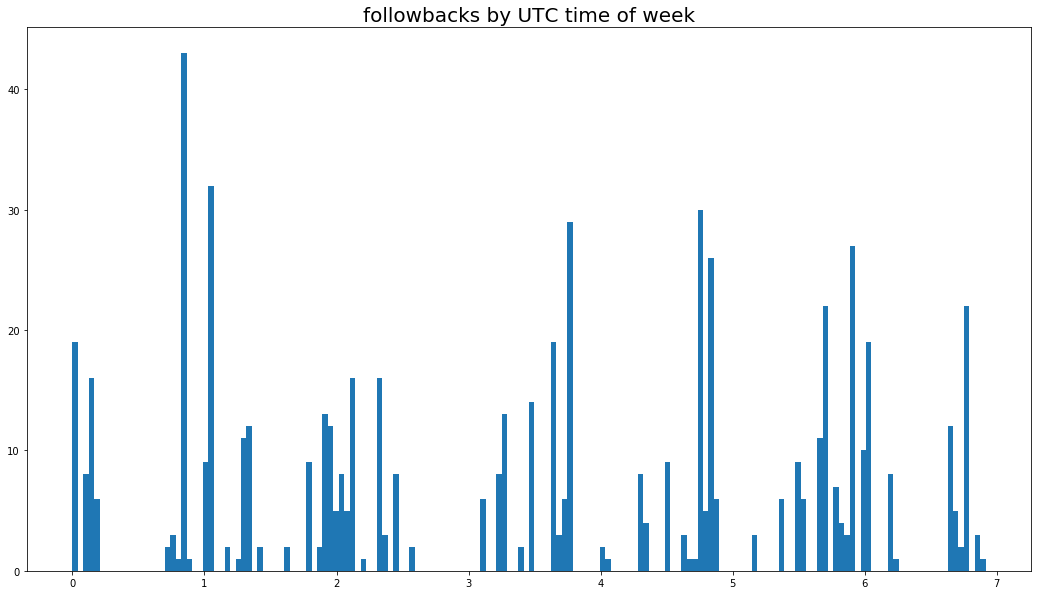

In [73]:
plt.title('followbacks by UTC time of week', fontsize=20)
plt.hist([t.weekday() + t.hour / 24 for k, t in follow_times.items() if k in follower_times], 7 * 24)